# Life Expectancy and GDP

In this project, made during the Data Science course provided by Codecademy, we were prompted to analyze a group of contries and understand possible connections between GDP and Life Expectancy at birth.

This analysis relies on the visualization techniques provided mainly by matplotlib and seaborn, which are imported using Python 3.

# 1. Import Libraries

First, we need to import the necessary libraries to work with, namely:

* Seaborn
* Matplotlib
* Pandas

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 2. Get to know the datasets provided

With the libraries in place, it is time to take a look into the dataset provided, and to get a feel for it.

In [6]:
world_data = pd.read_csv('all_data.csv')
print(world_data.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


From the columns provided, we can spot a problem: the third column, although helpful to describe the data, is not suited to be used regularly in the following analyses.  We need to rename it to something else. 

In order to maintain the ease of use, I rename it to << Life expectancy (birth) >>.

In [9]:
world_data.rename(columns = {'Life expectancy at birth (years)': 'Life expectancy (birth)'}, inplace = True)
print(world_data.columns.tolist()) #retrieves the name of the columns in the DataFrame

['Country', 'Year', 'Life expectancy (birth)', 'GDP']


Now, we need to discover:

1 - Which countries will be analyzed?

2 - Which years are available?

In [31]:
country = world_data.Country.unique()
print(country)
years = world_data.Year.unique()
print(years)

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


# 3. State your investigation Questions

After this initial discovery, and getting a sense of the available data, we can state our questions:

A) Overall, what is the trajectory of the GDP throught the world? And what about Life Expectancy at birth?

B) What is the trajectory of each country GDP and Life Expectancy at birth, between 2000 and 2015?

C) Which country has the highest GDP in 2015? And which country has the highest Life Expectancy at birth in 2015?

# Question A) Overall, what is the trajectory of the GDP throught the world? And what about Life Expectancy at birth?

In order to answer this question, we can use seaborn library to plot two bar graphs: one regarding overall GDP, and another regarding overall Life Expectancy at birth throughout the years available

(-1.0, 16.0, 50.0, 85.0)

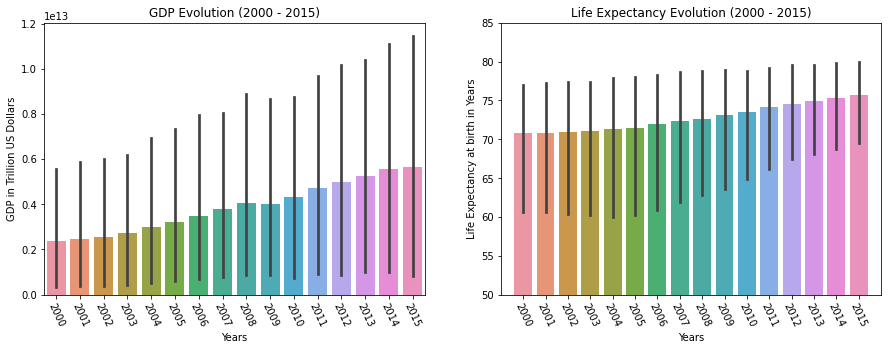

In [37]:
# 1st Graph - GDP Evolution with seaborn
plt.figure(figsize = (15, 5)) #define the width and height of the figure
g1 = plt.subplot(1, 2, 1) #will create two side-by-side graphs, but if the reader prefer one graph at a time, just leave the subplot empty
sns.barplot(data = world_data, x = 'Year', y = 'GDP')
plt.xlabel ('Years')
plt.ylabel('GDP in Trillion US Dollars')
plt.xticks(rotation = -65) #rotate the years in order to facilitate reading the graph
plt.title('GDP Evolution (' + str(years[0]) + ' - ' + str(years[-1]) + ')') #retrieves the 1st and last year available, and integrated in the title

# 2nd Graph - Life expectancy with seaborn
g2 = plt.subplot(1, 2, 2)
sns.barplot(data = world_data, x = 'Year', y = 'Life expectancy (birth)')
plt.xlabel('Years')
plt.ylabel('Life Expectancy at birth in Years')
plt.xticks(rotation = -65)
plt.title('Life Expectancy Evolution ('+ str(years[0]) + ' - ' + str(years[-1]) + ')')
plt.axis([-1, 16, 50, 85]) # allows to shorten the y-axis in LIFE EXPECTANCY, in order to be easier to understand

# B) What is the trajectory of each country GDP and Life Expectancy at birth, between 2000 and 2015?

After obtaining a hollistic view regarding GDP and Life Expectancy, we can now analyse each country evolution on both of these variables.
We will, once again, plot two graphs with seaborn library: one for GPD, another for Life expectancy at birth.

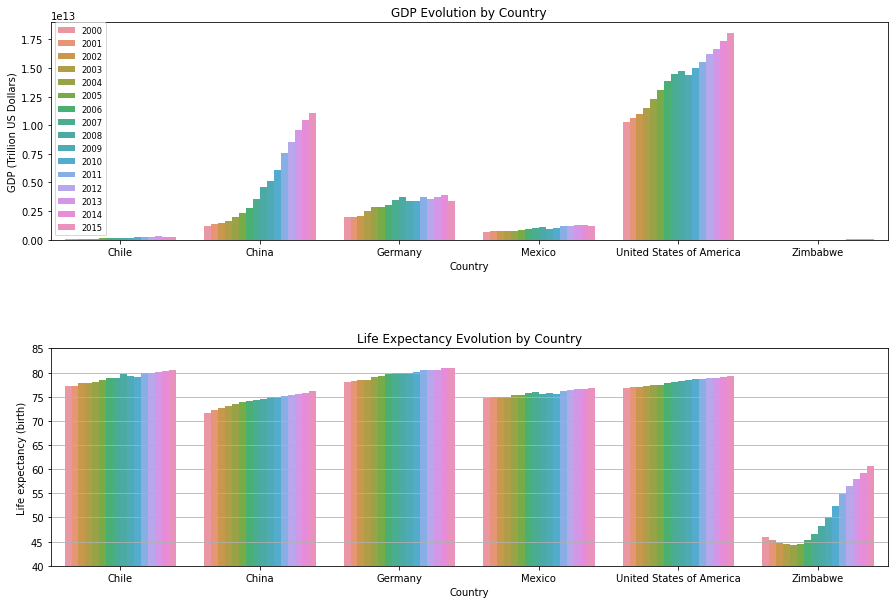

In [38]:
#3rd graph - GDP evolution with seaborn
plt.figure(figsize = [15, 10])
g3 = plt.subplot(2, 1, 1) #now, will be creating two graphs, one above the other
sns.barplot(data = world_data, x = 'Country', y = 'GDP', hue = 'Year')
g3.set_title('GDP Evolution by Country') # create a title to a specific graph
plt.ylabel('GDP (Trillion US Dollars)')
plt.subplots_adjust(hspace = 0.5) #adjust the space between both graphs
plt.legend(fontsize = 'small') #adjust the size of the legend

#4th graph - Life expectancy at birth with seaborn
g4 = plt.subplot(2, 1, 2)
sns.barplot(data = world_data, x = 'Country', y = 'Life expectancy (birth)', hue = 'Year')
plt.axis([-0.5, 5.5, 40, 85]) # allows to shorten the y-axis in LIFE EXPECTANCY, in order to be easier to understand
g4.set_title('Life Expectancy Evolution by Country')
g4.get_legend().remove() # remove legends in the 4th graph, the one bellow GPD EVOLUTION BY COUNTRY
g4.yaxis.grid() #create lines along the Y-Axis, to better understanding the data presented


Analyzing the output presented for this question, new questions arise:

* In terms of GDP, we can see a huge disparity between countries, which make it difficult to compare the impact of GDP in the Life expectancy variable throughout the years;
* Additionally, Zimbabwe has a huge difference regarding Life expectancy (with a decrease in the early years provided!). What could have cause it?

Along these lines, although we can already answer the question, new graphics are needed to better understand each country specific situation.

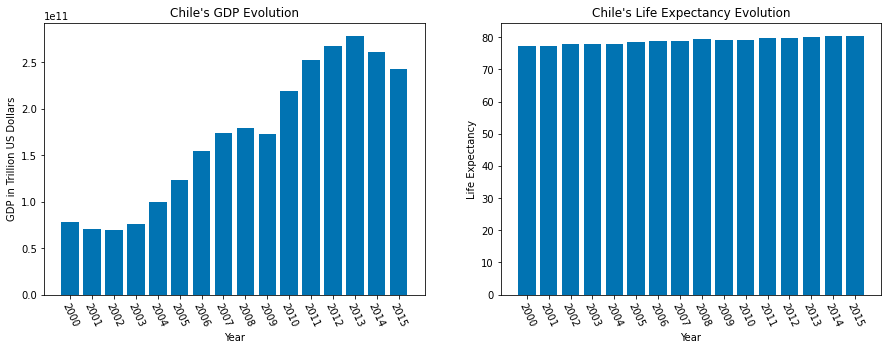

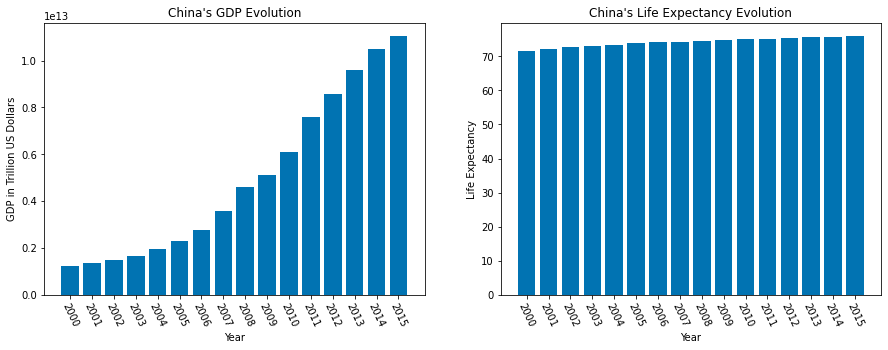

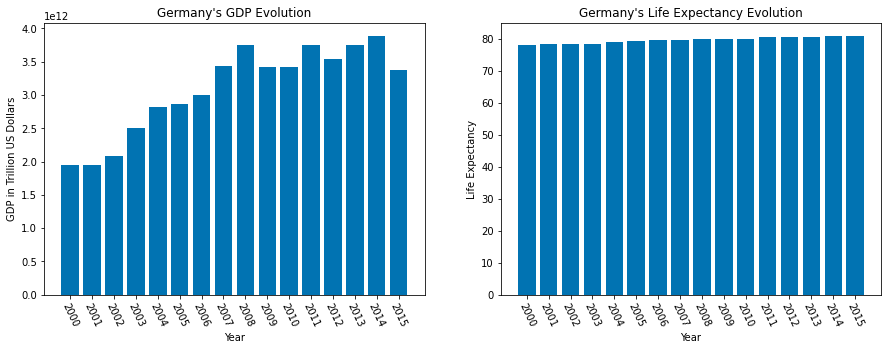

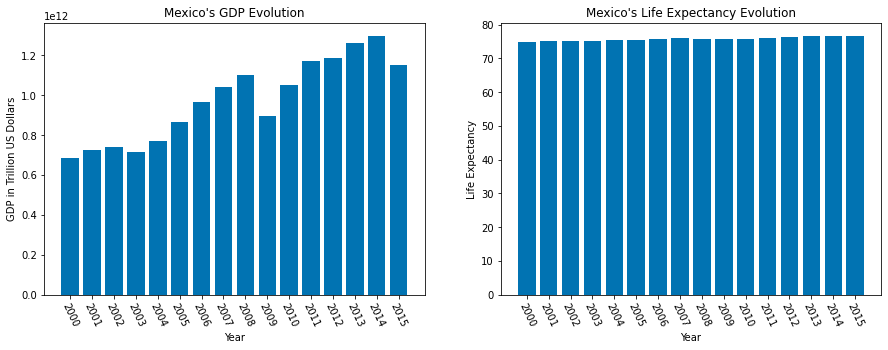

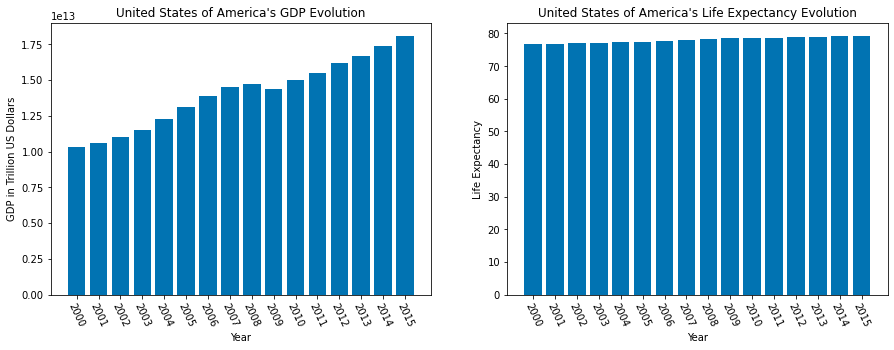

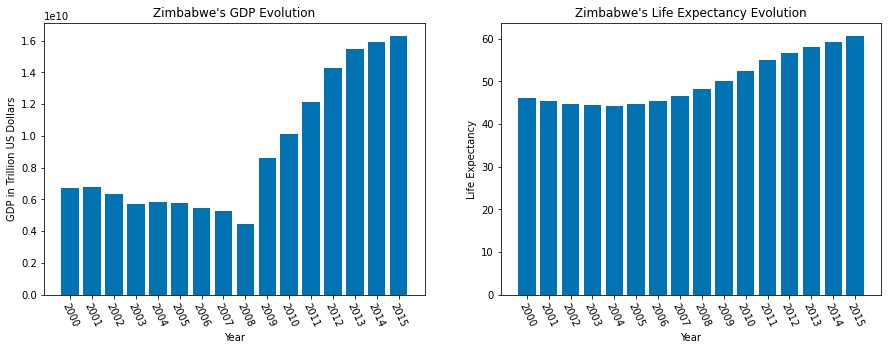

In [39]:
#5th graph - create pairs of bar graphs for each country. The best way is to automate with a FOR LOOP

countries = list(country) #first, we need to turn the COUNTRY, defined previoulsy, to list
x = range(len(years)) #second, we need to define the X-Axis for each graph

for name in countries:
    plt.figure(figsize = (15, 5))
    
    #plot GDP Graph
    h1 = world_data.GDP[world_data.Country == name]
    g51 = plt.subplot(1, 2, 1)
    plt.bar(x, h1)
    plt.title(name + ('\'s GDP Evolution'))
    g51.set_xticks(x)
    g51.set_xticklabels(years)
    plt.xticks(rotation = -65)
    plt.xlabel('Year')
    plt.ylabel('GDP in Trillion US Dollars')
    
    #plot Life Expectancy graph
    h2 = world_data['Life expectancy (birth)'][world_data.Country == name]
    g52 = plt.subplot(1, 2, 2)
    plt.bar(x, h2)
    plt.title(name + ('\'s Life Expectancy Evolution'))
    g52.set_xticks(x)
    g52.set_xticklabels(years)
    plt.xticks(rotation = -65)
    plt.xlabel('Year')
    plt.ylabel('Life Expectancy')
    

With this new graphs, we can now compare the evolution of GDP and Life expectancy in a much more easier way.
Some insights we can now obtain are:

* Chile's GDP has registered a overall upward trend from 2002 to 2013; and registered a downward trend from 2013 onwards. Meanwhile, the life expectancy at birth has been rising slowly throughout the years.
* China's GDP has registered a great upward trend since 2000; and the life expectancy at birth has also been rising slowly through the years (although it remains bellow of, for example, Chile's life expectancy).
* Zimbabwe's GDP registered a downward trend from 2000 until 2008, and an upward trend from 2008 until 2018; meanwhile, Zimbabwe's life expectancy at birth was decreasing from 2000 until 2004, and has registered a step increase ever since (nevertheless, is the lowest between all countries analyzed). This, in turn, allow us to especulate that the financial crisis of 2008 didn't provide a negative impact to life expectancy at the region.

# C) Which country has the highest GDP in 2015? And which country has the highest Life Expectancy at birth in 2015?

Now, with all the data collected, we can answer this question.
* Highest GDP in 2015? United States of America
* Highest Life Expectancy at Birth in 2015? Germany

So, does this mean that GDP and Life Expectancy at birth aren't correlated? To answer this question, we need to do a pearson correlation test

In [36]:
from scipy.stats import pearsonr

corr_rel, pr = pearsonr(world_data.GDP, world_data['Life expectancy (birth)'])
print(corr_rel)

0.34320674844915594


Since the correlation is equal to 0.34 (aprox.), we can say that there's a linear positive association between variables. Note, however, that the data used for this exercise is extremelly limited, in terms of countries and years, so a more embracing dataset may provide a different value.

Thank you for your time reading this exercise, and if you have any question or feedback, feel free to contact me through GITHUB.

Have a nice day!
- João